In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
df = pd.read_csv("./iris_data.csv")
target_mapping = {"setosa": 0,
                  "versicolor": 1,
                  "virginica": 2}
Y = df["target"].map(target_mapping)

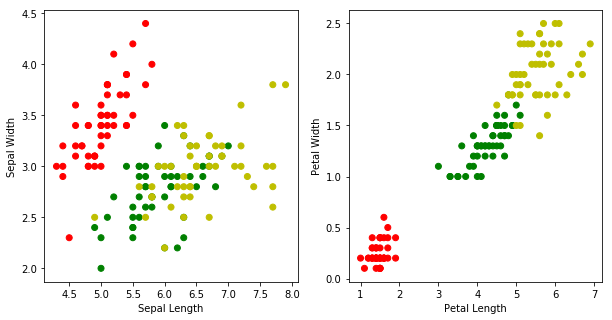

In [3]:
colmap = np.array(["r", "g", "y"])
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.subplots_adjust(hspace = .5)
plt.scatter(df["sepal_length"], df["sepal_width"], color=colmap[Y])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.subplot(1, 2, 2)
plt.scatter(df["petal_length"], df["petal_width"], color=colmap[Y])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

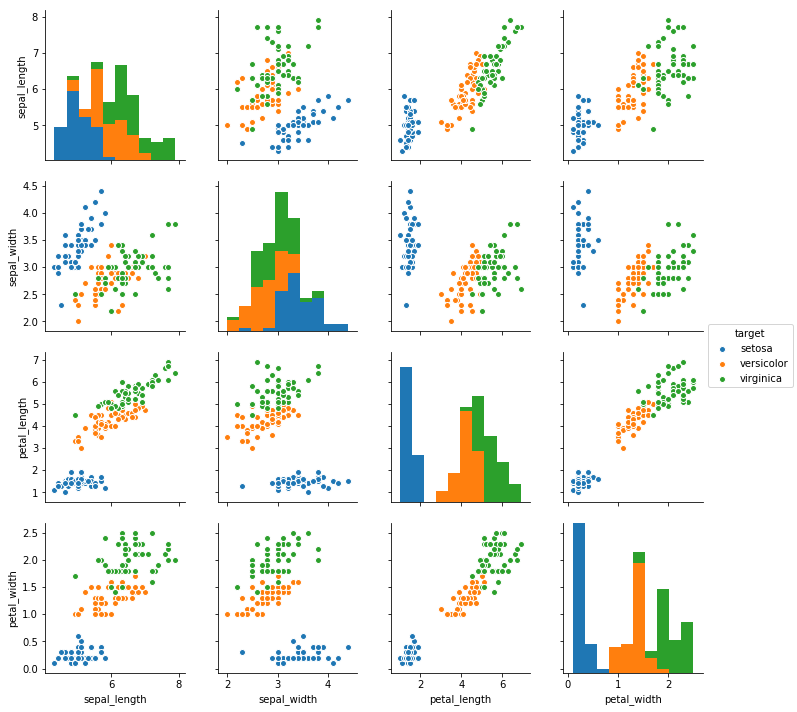

In [4]:
sns.pairplot(df, hue="target")

In [6]:
np.random.seed(7)
df["target"] = df["target"].map(target_mapping)
dataset = df.values
np.random.shuffle(dataset)

In [7]:
X = dataset[:,0:4].astype(float)
Y = to_categorical(dataset[:,4])

X -= X.mean(axis=0)
X /= X.std(axis=0)

X_train, Y_train = X[:120], Y[:120]    
X_test, Y_test = X[120:], Y[120:]     

In [8]:
model = Sequential()
model.add(Dense(6, input_shape=(4,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 21        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train, Y_train, epochs=100, batch_size=5)

loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("準確度 = {:.2f}".format(accuracy))
# 儲存Keras模型
#model.save("iris.h5")

Epoch 1/100
120/120 [==============================] - 3s 25ms/step - loss: 1.0662 - acc: 0.3583
Epoch 2/100
120/120 [==============================] - 0s 1ms/step - loss: 1.0083 - acc: 0.4500
Epoch 3/100
120/120 [==============================] - 0s 806us/step - loss: 0.9599 - acc: 0.5250
Epoch 4/100
120/120 [==============================] - 0s 750us/step - loss: 0.9186 - acc: 0.5667
Epoch 5/100
120/120 [==============================] - 0s 736us/step - loss: 0.8816 - acc: 0.5917
Epoch 6/100
120/120 [==============================] - 0s 914us/step - loss: 0.8473 - acc: 0.6250
Epoch 7/100
120/120 [==============================] - 0s 756us/step - loss: 0.8182 - acc: 0.6500
Epoch 8/100
120/120 [==============================] - 0s 711us/step - loss: 0.7888 - acc: 0.6583
Epoch 9/100
120/120 [==============================] - 0s 721us/step - loss: 0.7601 - acc: 0.6583
Epoch 10/100
120/120 [==============================] - 0s 777us/step - loss: 0.7310 - acc: 0.6833
Epoch 11/100
120/120 [

120/120 [==============================] - 0s 848us/step - loss: 0.0898 - acc: 0.9750
Epoch 85/100
120/120 [==============================] - 0s 1ms/step - loss: 0.0884 - acc: 0.9750
Epoch 86/100
120/120 [==============================] - 0s 814us/step - loss: 0.0867 - acc: 0.9750
Epoch 87/100
120/120 [==============================] - 0s 806us/step - loss: 0.0859 - acc: 0.9750
Epoch 88/100
120/120 [==============================] - 0s 848us/step - loss: 0.0833 - acc: 0.9750
Epoch 89/100
120/120 [==============================] - 0s 1000us/step - loss: 0.0820 - acc: 0.9750
Epoch 90/100
120/120 [==============================] - 0s 753us/step - loss: 0.0808 - acc: 0.9750
Epoch 91/100
120/120 [==============================] - 0s 798us/step - loss: 0.0805 - acc: 0.9750
Epoch 92/100
120/120 [==============================] - 0s 856us/step - loss: 0.0781 - acc: 0.9750
Epoch 93/100
120/120 [==============================] - 0s 814us/step - loss: 0.0776 - acc: 0.9750
Epoch 94/100
120/120 [==

In [ ]:
'''
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("iris.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
'''

In [10]:
Y_pred = model.predict_classes(X_test)
print(Y_pred)
Y_target = dataset[:,4][120:].astype(int)
print(Y_target)
# 顯示混淆矩陣
tb = pd.crosstab(Y_target, Y_pred, rownames=["label"], colnames=["predict"])
print(tb)

[0 1 1 2 2 1 1 0 1 1 0 0 0 1 1 0 2 2 2 2 0 2 1 2 0 2 1 2 1 0]
[0 1 1 2 2 1 2 0 1 1 0 0 0 1 1 0 2 2 1 2 0 2 1 1 0 2 1 2 1 0]
predict  0   1  2
label            
0        9   0  0
1        0  10  2
2        0   1  8
